In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 
import sqlite3
from IPython.display import clear_output


In [3]:
w_h_data = pd.read_csv('raw_data/WHR_2005-2024.csv')
inf_data = pd.read_csv('raw_data/WHI_Inflation.csv')
life_data = pd.read_csv('raw_data/Life_expectancy.csv')
suicide_data = pd.read_csv('raw_data/Suicide_Rate.csv')
gci_data = pd.read_csv('raw_data/world_data_2023.csv')


Renamed/fixed the columns and sorted by year for world happiness dataframe.

In [4]:
w_h_data = w_h_data.rename(columns={
    'Log GDP per capita': 'GDP_per_capita',
    'Healthy life expectency at birth': 'Life_expectency',
    'Freedom to make life choices': 'Freedom_of_choice',
    'Life Ladder': 'happiness_score'
})
w_h_data
w_h_data_trans = w_h_data.T.reset_index()
w_h_data_trans['index'] = w_h_data_trans['index'].str.replace(' ', '_')
w_h_data_trans['index'] = w_h_data_trans['index'].map(str.lower)
w_h_data_trans

reset_w_h_data = w_h_data_trans.set_index('index').T
w_h_data = reset_w_h_data

w_h_data['social_support'] = w_h_data['social_support'].str.replace('%', '')
w_h_data = w_h_data.drop(['positive_affect', 'negative_affect'], axis=1)
w_h_data.round(2)
w_h_data

index,country_name,year,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy_at_birth,freedom_of_choice,generosity,perceptions_of_corruption
0,Afghanistan,2008,3.72359,7.350416,45.07,50.5,0.718114,0.164055,0.881686
1,Afghanistan,2009,4.401778,7.508646,55.23,50.799999,0.678896,0.187297,0.850035
2,Afghanistan,2010,4.758381,7.6139,53.91,51.099998,0.600127,0.117861,0.706766
3,Afghanistan,2011,3.831719,7.581259,52.11,51.400002,0.495901,0.160098,0.731109
4,Afghanistan,2012,3.782938,7.660506,52.06,51.700001,0.530935,0.234157,0.77562
...,...,...,...,...,...,...,...,...,...
2358,Zimbabwe,2019,2.693523,7.697755,75.92,53.099998,0.631908,-0.050874,0.830652
2359,Zimbabwe,2020,3.159802,7.59605,71.72,53.575001,0.643303,0.002848,0.788523
2360,Zimbabwe,2021,3.154578,7.656878,68.52,54.049999,0.667636,-0.079007,0.756945
2361,Zimbabwe,2022,3.29622,7.670073,66.62,54.525002,0.651987,-0.072935,0.752632


In [5]:
w_h_data['country_name'].nunique()

165

In [6]:
happiness_mean = w_h_data['happiness_score'].mean()
happiness_mean

np.float64(5.483560554418111)

In [7]:
happiness_min = w_h_data['happiness_score'].min()
happiness_min

1.2812711

In [8]:
happiness_max = w_h_data['happiness_score'].max()
happiness_max

8.01893425

Combined life/life expectancy and suidide rate dataframes into one dataframe. Renamed/fixed column names.

In [9]:
life_death_data = pd.merge(life_data, suicide_data, on='Country', how='outer')
life_death_data
life_death_data = life_death_data.rename(columns={
    'Life Expectancy (years) - Men': 'male_life_expectancy',
    'Life Expectancy (years) - Women': 'female_life_expectancy',
    'Fertility Rate (births per woman)': 'fertility_rate'
})
life_death_data

life_death_data_trans = life_death_data.T.reset_index()
life_death_data_trans['index'] = life_death_data_trans['index'].str.replace(' ', '_')
life_death_data_trans['index'] = life_death_data_trans['index'].map(str.lower)
life_death_data_trans

reset_life_death_data = life_death_data_trans.set_index('index').T
life_death_data = reset_life_death_data
life_death_data


index,country,male_life_expectancy,female_life_expectancy,happiness_score,fertility_rate,gdp_per_capita,suicide_rate
0,Afghanistan,60.6,68.2,3.794,4.7,1105.0,20.6
1,Albania,74.8,81.3,4.959,1.7,4932.0,32.4
2,Algeria,73.3,78.9,5.605,2.9,4534.0,15.6
3,Andorra,81.7,84.8,6.955,1.4,46622.0,18.9
4,Angola,58.1,65.6,4.105,5.3,2077.0,20.5
...,...,...,...,...,...,...,...
145,Switzerland,NaN,NaN,NaN,NaN,83832.0,12.9
146,Thailand,NaN,NaN,NaN,NaN,6792.0,27.8
147,United Arab Emirates,76.3,80.6,6.39,2.6,NaN,NaN
148,United Kingdom,79.0,83.0,6.72,1.7,39720.0,11.1


Dropping unneeded columns (already have in other data), fixed column names, sorted by year for inflation data.

In [10]:
inf_data = inf_data.drop(['Official Core Consumer Price Inflation', 'Headline Consumer Price Inflation', 'Producer Price Inflation', 'Generosity','Perceptions of corruption', 'Healthy life expectancy at birth', 'Social support', 'Continent/Region'], axis=1)

inf_data_trans = inf_data.T.reset_index()
inf_data_trans['index'] = inf_data_trans['index'].str.replace(' ', '_')
inf_data_trans['index'] = inf_data_trans['index'].map(str.lower)
inf_data_trans

reset_inf_data = inf_data_trans.set_index('index').T
inf_data = reset_inf_data

inf_data = inf_data.rename(columns={
    'energy_consumer_price_inflation': 'energy_inflation',
    'food_consumer_price_inflation': 'food_inflation',
    'gdp_deflator_index_growth_rate': 'gdp_deflator_index'
})

inf_data


index,country,year,energy_inflation,food_inflation,gdp_deflator_index,score,gdp_per_capita,freedom_to_make_life_choices
0,Afghanistan,2015,-4.25,-0.84,2.66509,3.575,0.31982,0.23414
1,Afghanistan,2016,2.07,5.67,-2.409509,3.36,0.38227,0.1643
2,Afghanistan,2017,4.44,6.94,2.404,3.794,0.401477,0.10618
3,Afghanistan,2018,1.474185,-1.045952,2.071208,3.632,0.332,0.085
4,Afghanistan,2019,-2.494359,3.79477,6.520928,3.203,0.35,0.0
...,...,...,...,...,...,...,...,...
1227,Zimbabwe,2019,90.808071,86.124371,-4.035235,3.663,0.366,0.361
1228,Zimbabwe,2020,306.431673,601.020236,568.971862,3.2992,0.425564,0.377405
1229,Zimbabwe,2021,69.82,105.8,113.294981,3.145,0.457,0.359
1230,Zimbabwe,2022,97.24655,149.967035,113.018434,2.995,0.947,0.329


In the following code, I changed NAN to 0, as I did not want to remove rows due to missing data, in case there might still be pertinent data for that country in another column.
Also, I could not fill it with means/averages as that could bring in info from other countries, which would not be correct. So instead, I filled with 0 so that the columns could be changed to number/real/float types for maninpulation and removed as warrarnted. 

Removing NAN from inflation data

In [11]:
inf_data.isnull().sum()
columns_to_fill1 = ['energy_inflation', 'food_inflation', 'gdp_deflator_index' ]
for col in columns_to_fill1:
    inf_data[col] = inf_data[col].fillna(0)
clear_output()
inf_data.round(2)
columns_to_fix1 = ['energy_inflation', 'food_inflation', 'gdp_deflator_index', 'score', 'gdp_per_capita', 'freedom_to_make_life_choices']
for col in columns_to_fix1:
    inf_data[col] = inf_data[col].astype(float)

In [12]:
inf_data.isnull().sum()

index
country                         0
year                            0
energy_inflation                0
food_inflation                  0
gdp_deflator_index              0
score                           0
gdp_per_capita                  0
freedom_to_make_life_choices    0
dtype: int64

Removing NAN for life expectancy and suicide rate data

In [13]:
life_death_data.isnull().sum()
columns_to_fill2 = ['male_life_expectancy', 'female_life_expectancy', 'happiness_score', 'fertility_rate', 'gdp_per_capita', 'suicide_rate']
for col in columns_to_fill2:
    life_death_data[col] = life_death_data[col].fillna(0)
columns_to_fix2 = ['male_life_expectancy', 'female_life_expectancy', 'happiness_score', 'fertility_rate', 'gdp_per_capita', 'suicide_rate']
clear_output()
for col in columns_to_fix2:
    life_death_data[col] = life_death_data[col].astype(float)

In [14]:
life_death_data.isnull().sum()

index
country                   0
male_life_expectancy      0
female_life_expectancy    0
happiness_score           0
fertility_rate            0
gdp_per_capita            0
suicide_rate              0
dtype: int64

Removing NAN from world happiness data. Due to the inability to see where the data shifted from one country to another, I could not use means/averages to fill spots. I did do some of that where possible in excel before moving the data to vscode.

In [15]:
w_h_data.isnull().sum()
columns_to_fill3 = ['gdp_per_capita', 'social_support', 'healthy_life_expectancy_at_birth', 'freedom_of_choice', 'generosity', 'perceptions_of_corruption']
for col in columns_to_fill3:
    w_h_data[col] = w_h_data[col].fillna(0)
columns_to_fix3 = ['gdp_per_capita', 'social_support', 'healthy_life_expectancy_at_birth', 'freedom_of_choice', 'generosity', 'perceptions_of_corruption']
clear_output()
for col in columns_to_fix3:
    w_h_data[col] = w_h_data[col].astype(float)    

In [16]:
w_h_data.isnull().sum()

index
country_name                        0
year                                0
happiness_score                     0
gdp_per_capita                      0
social_support                      0
healthy_life_expectancy_at_birth    0
freedom_of_choice                   0
generosity                          0
perceptions_of_corruption           0
dtype: int64

Removing/fixing colums for GCI data

In [17]:
gci_data = gci_data.drop(['Armed Forces size', 'Abbreviation', 'Agricultural Land( %)', 'Land Area(Km2)', 'Calling Code', 'Capital/Major City', 'CPI', 'CPI Change (%)', 'Currency-Code', 'Gasoline Price', 'Largest city', 'Official language', 'Urban_population', 'Total tax rate', 'Latitude', 'Longitude'], axis=1)
gci_data_trans = gci_data.T.reset_index()
gci_data_trans['index'] = gci_data_trans['index'].str.replace(' ', '_')
gci_data_trans['index'] = gci_data_trans['index'].map(str.lower)

reset_gci_data = gci_data_trans.set_index('index').T
gci_data = reset_gci_data
gci_data = gci_data.rename(columns={
    'gross_primary_education_enrollment_(%)': 'primary_education_enrollment',
    'gross_tertiary_education_enrollment_(%)': 'tertiary_education_enrollment',
    'population:_labor_force_participation_(%)': 'labor_force_participation',
    'tax_revenue_(%)': 'tax_revenue',
    'forested_area_(%)': 'forested_area',
    'co2-emissions': 'co2_emissions'
})

columns_to_fill5 = ['gdp', 'minimum_wage']
for col in columns_to_fill5:
    gci_data[col] = gci_data[col].str.replace('$', '')
columns_to_fill6 = ['forested_area', 'primary_education_enrollment', 'tertiary_education_enrollment', 'out_of_pocket_health_expenditure', 'labor_force_participation', 'tax_revenue', 'unemployment_rate']
for col in columns_to_fill6:
    gci_data[col] = gci_data[col].str.replace('%', '')
columns_to_fill7 = ['gdp', 'population']
for col in columns_to_fill7:
    gci_data[col] = gci_data[col].str.replace(',', '')

gci_data.round(2)
gci_data

index,country,density,birth_rate,co2_emissions,fertility_rate,forested_area,gdp,primary_education_enrollment,tertiary_education_enrollment,infant_mortality,life_expectancy,maternal_mortality_ratio,minimum_wage,out_of_pocket_health_expenditure,physicians_per_thousand,population,labor_force_participation,tax_revenue,unemployment_rate
0,Afghanistan,60.0,32.49,8672.0,4.47,2.10,19101353833,104.00,9.70,47.9,64.5,638.0,0.43,78.40,0.28,38041754,48.90,9.30,11.12
1,Albania,105.0,11.78,4536.0,1.62,28.10,15278077447,107.00,55.00,7.8,78.5,15.0,1.12,56.90,1.2,2854191,55.70,18.60,12.33
2,Algeria,18.0,24.28,150006.0,3.02,0.80,169988236398,109.90,51.40,20.1,76.7,112.0,0.95,28.10,1.72,43053054,41.20,37.20,11.70
3,Andorra,164.0,7.2,469.0,1.27,34.00,3154057987,106.40,NaN,2.7,NaN,NaN,6.63,36.40,3.33,77142,NaN,NaN,NaN
4,Angola,26.0,40.73,34693.0,5.52,46.30,94635415870,113.50,9.30,51.6,60.8,241.0,0.71,33.40,0.21,31825295,77.50,9.20,6.89
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189,Venezuela,32.0,17.88,164175.0,2.27,52.70,482359318768,97.20,79.30,21.4,72.1,125.0,0.01,45.80,1.92,28515829,59.70,NaN,8.80
190,Vietnam,314.0,16.75,192668.0,2.05,48.10,261921244843,110.60,28.50,16.5,75.3,43.0,0.73,43.50,0.82,96462106,77.40,19.10,2.01
191,Yemen,56.0,30.45,10609.0,3.79,1.00,26914402224,93.60,10.20,42.9,66.1,164.0,NaN,81.00,0.31,29161922,38.00,NaN,12.91
192,Zambia,25.0,36.19,5141.0,4.63,65.20,23064722446,98.70,4.10,40.4,63.5,213.0,0.24,27.50,1.19,17861030,74.60,16.20,11.43


Removing NAN from GCI data

In [18]:
gci_data.isnull().sum()
columns_to_fill4 = ['co2_emissions', 'forested_area', 'birth_rate', 'fertility_rate', 'gdp', 'primary_education_enrollment', 'tertiary_education_enrollment', 'infant_mortality', 'life_expectancy', 'maternal_mortality_ratio', 'minimum_wage', 'out_of_pocket_health_expenditure', 'physicians_per_thousand', 'labor_force_participation', 'tax_revenue', 'unemployment_rate']
for col in columns_to_fill4:
    gci_data[col] = gci_data[col].fillna(0)
columns_to_fix4 = ['co2_emissions', 'forested_area', 'birth_rate', 'fertility_rate', 'gdp', 'primary_education_enrollment', 'tertiary_education_enrollment', 'infant_mortality', 'life_expectancy', 'maternal_mortality_ratio', 'minimum_wage', 'out_of_pocket_health_expenditure', 'physicians_per_thousand', 'labor_force_participation', 'tax_revenue', 'unemployment_rate']
clear_output()
for col in columns_to_fix4:
    gci_data[col] = gci_data[col].astype(float)  


In [19]:
gci_data.isnull().sum()

index
country                             0
density                             0
birth_rate                          0
co2_emissions                       0
fertility_rate                      0
forested_area                       0
gdp                                 0
primary_education_enrollment        0
tertiary_education_enrollment       0
infant_mortality                    0
life_expectancy                     0
maternal_mortality_ratio            0
minimum_wage                        0
out_of_pocket_health_expenditure    0
physicians_per_thousand             0
population                          0
labor_force_participation           0
tax_revenue                         0
unemployment_rate                   0
dtype: int64

For populations under 1 million (due to charting constraints), comparing healthy life expectancy and out of pocket healthcare costs in 2023. Anything over 25% was included as that is what WHO considers to be at risk. Over 40% is considered to be catastrophic spending on health care by WHO. Life expectancy was capped at 75 as WHO considered the high average for most countries to be 70+. 
You will see some countries have higher health costs than healthy life expectancy. 

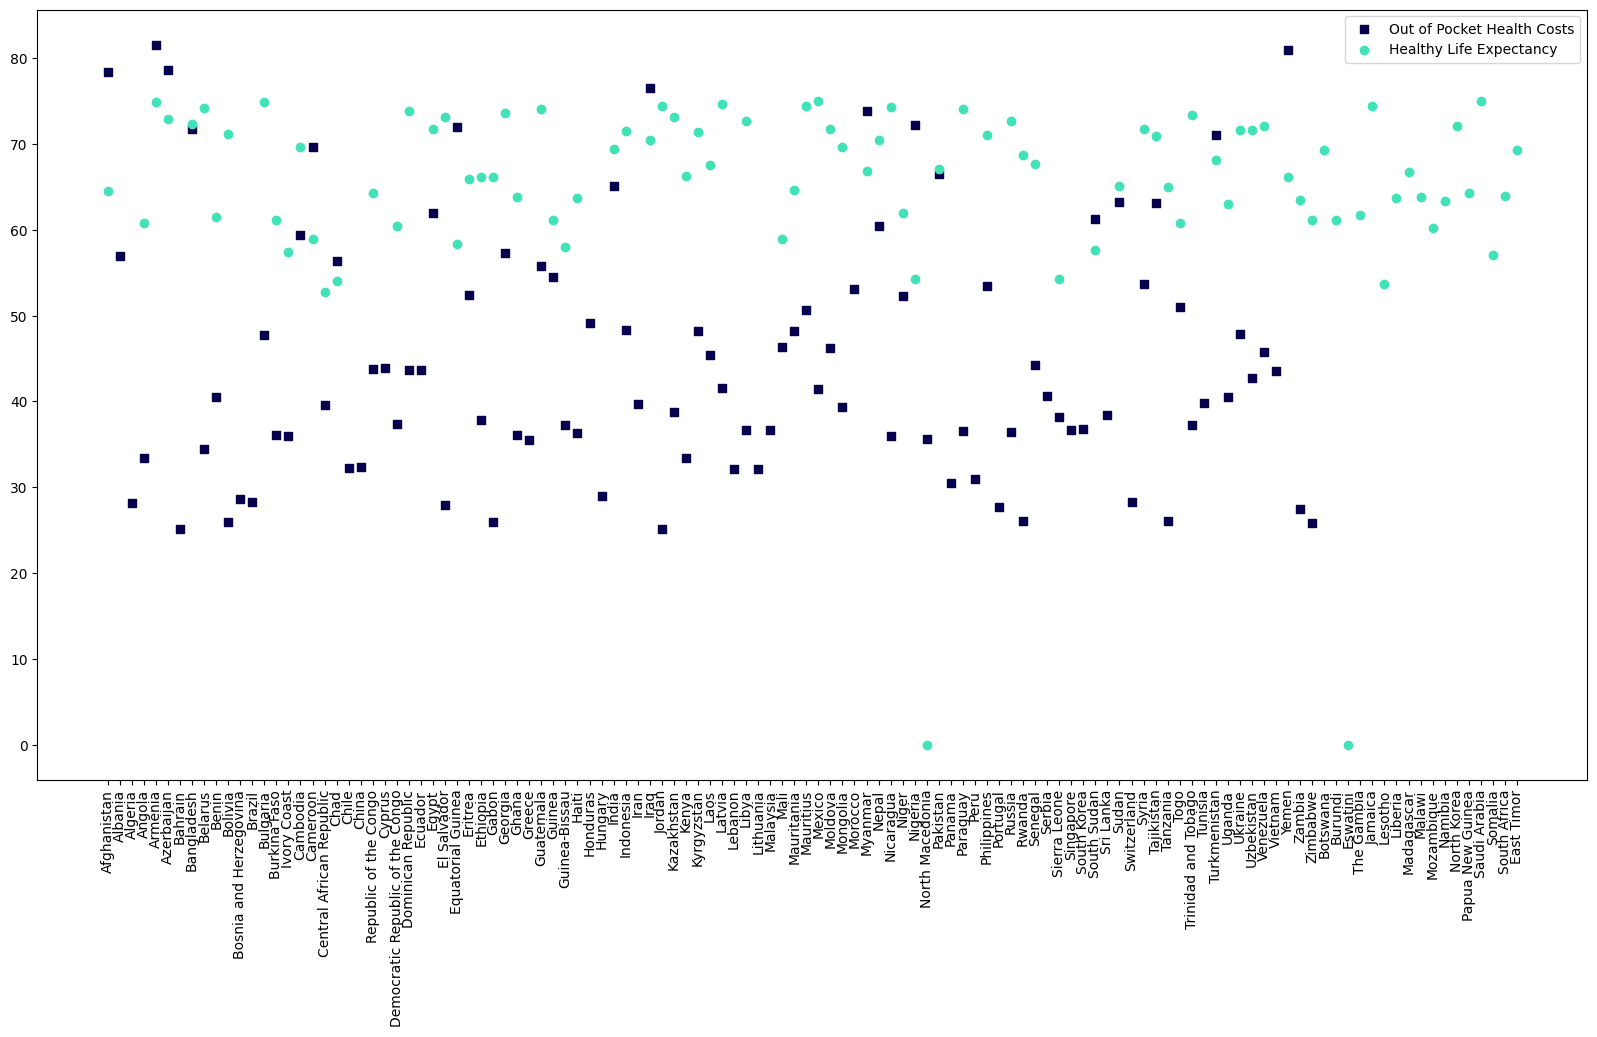

In [20]:
gci_data['population'] = gci_data['population'].astype(int)
gci_data = gci_data[gci_data['population'] > 1000000]
gci_data

"""Removing no data rows to turn out of pocket and life expectancy into numbers."""
gci_data2 = gci_data[~gci_data['out_of_pocket_health_expenditure'].isin(['No data'])]
gci_data2['out_of_pocket_health_expenditure'] = gci_data2['out_of_pocket_health_expenditure'].astype(float)
gci_data3 = gci_data[~gci_data['life_expectancy'].isin(['No data'])]
gci_data3['life_expectancy'] = gci_data3['life_expectancy'].astype(float)

health_cost = gci_data2[gci_data2['out_of_pocket_health_expenditure'] > 25]
life_span = gci_data3[gci_data3['life_expectancy'] <= 75]
clear_output()

plt.figure(figsize=(20,10))
plt.xticks(rotation=90)
plt.scatter(health_cost['country'], health_cost['out_of_pocket_health_expenditure'], label='Out of Pocket Health Costs', color='#07004D', marker='s')
plt.scatter(life_span['country'], life_span['life_expectancy'], label='Healthy Life Expectancy', color='#42E2B8')
plt.legend()
plt.show()


Fertility rate and happiness scores suggest that overall low happiness creates higher ferility rates (reproductive behavior). The world national average is 2.7.

In [21]:
"""Filtering out columns fertility_rate and happiness_score with no data for them to be turned into integers or floats."""
life_death_data2 = life_death_data.map(lambda x: int(round(x, 0)) if isinstance(x, (int, float)) else x)

world_rate = life_death_data2['fertility_rate'].mean()
world_rate

np.float64(2.58)

Unhappy people reproduce more.

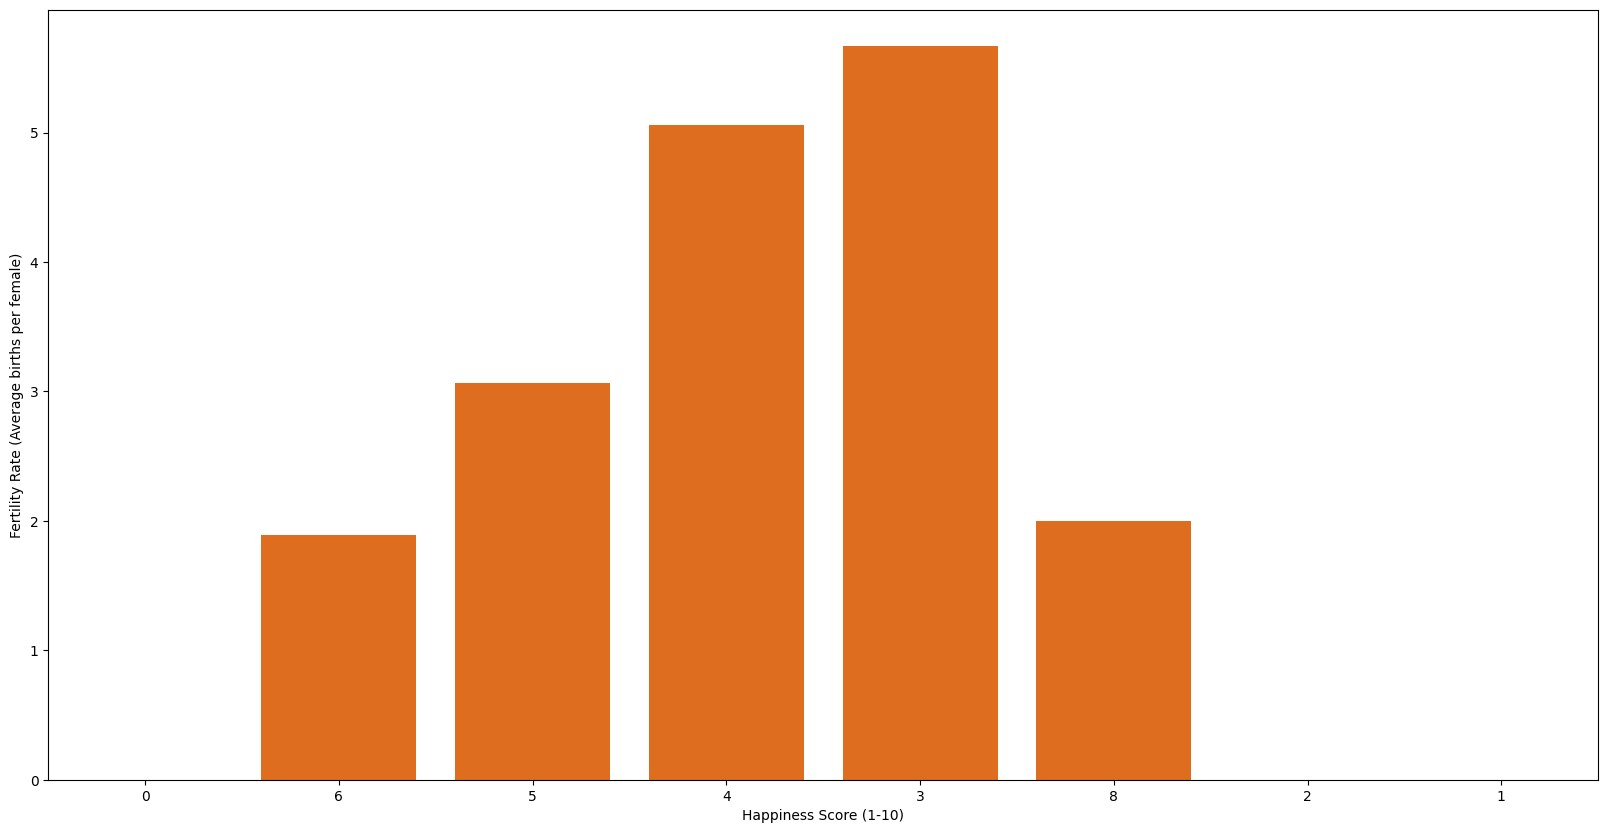

In [22]:
plt.figure(figsize=(20,10))
order = life_death_data2.sort_values('happiness_score').fertility_rate
sns.barplot(x='happiness_score', y='fertility_rate', data=life_death_data2, errorbar=None, color='#FF6700', order=order)
plt.xlabel('Happiness Score (1-10)')
plt.ylabel('Fertility Rate (Average births per female)')
plt.show()

Exploring the least happiest nations. These nations all have a happiness score of 3 or 4. There are 20 nations on this list. They also have lower life expectancy as the world average male avg is 72 and female avg is 77. The expectancy worldwide in 2023 was 73.5.

In [23]:
"""Finding the mean of both male and female life expectancy"""
male_mean = life_death_data2['male_life_expectancy'].mean()
male_mean
female_mean = life_death_data2['female_life_expectancy'].mean()
female_mean


np.float64(73.04)

In [24]:
"""Finding the combined expectancy and adding it into a new column after removing countries with 0 in either column"""
life_death_data2 = life_death_data2.query('male_life_expectancy > 0 and female_life_expectancy > 0')
life_death_data2['combined_expectancy'] = (life_death_data2['male_life_expectancy'] + life_death_data2['female_life_expectancy']) / 2
life_death_data2


index,country,male_life_expectancy,female_life_expectancy,happiness_score,fertility_rate,gdp_per_capita,suicide_rate,combined_expectancy
0,Afghanistan,61,68,4,5,1105,21,64.5
1,Albania,75,81,5,2,4932,32,78.0
2,Algeria,73,79,6,3,4534,16,76.0
3,Andorra,82,85,7,1,46622,19,83.5
4,Angola,58,66,4,5,2077,20,62.0
...,...,...,...,...,...,...,...,...
142,Qatar,78,82,6,2,0,0,80.0
143,Singapore,82,86,7,1,0,0,84.0
147,United Arab Emirates,76,81,6,3,0,0,78.5
148,United Kingdom,79,83,7,2,39720,11,81.0


People in unhappy nations die earlier.

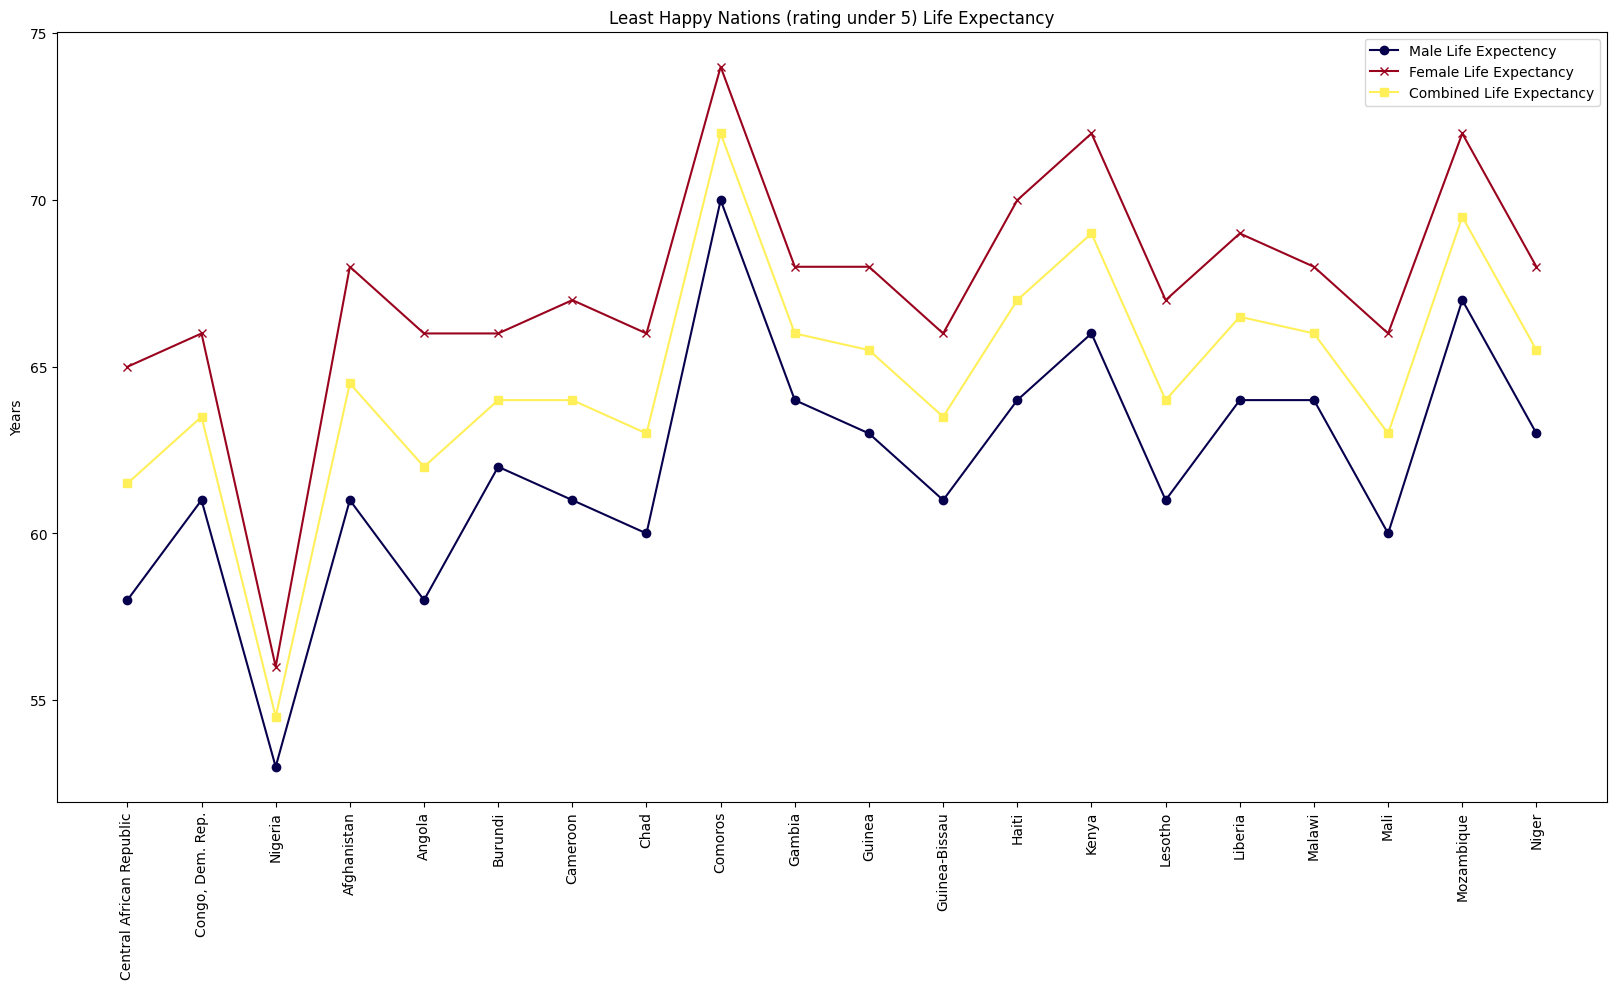

In [25]:
bottom_20 = life_death_data2.nsmallest(20, 'happiness_score')
plt.figure(figsize=(20,10))
plt.xticks(rotation=90)
plt.plot(bottom_20['country'], bottom_20['male_life_expectancy'], label= 'Male Life Expectency', color='#07004D', marker='o')
plt.plot(bottom_20['country'], bottom_20['female_life_expectancy'], label='Female Life Expectancy', color='#9A031E', marker='x')
plt.plot(bottom_20['country'], bottom_20['combined_expectancy'], label='Combined Life Expectancy', color='#FFF05A', marker='s')
plt.legend()
plt.ylabel('Years')
plt.title('Least Happy Nations (rating under 5) Life Expectancy')
plt.show()

In [26]:
input('Once you have finished reviewing the life expectency chart, please press enter to continue.')

''

Year by year happiness report on any country in the list, using input.

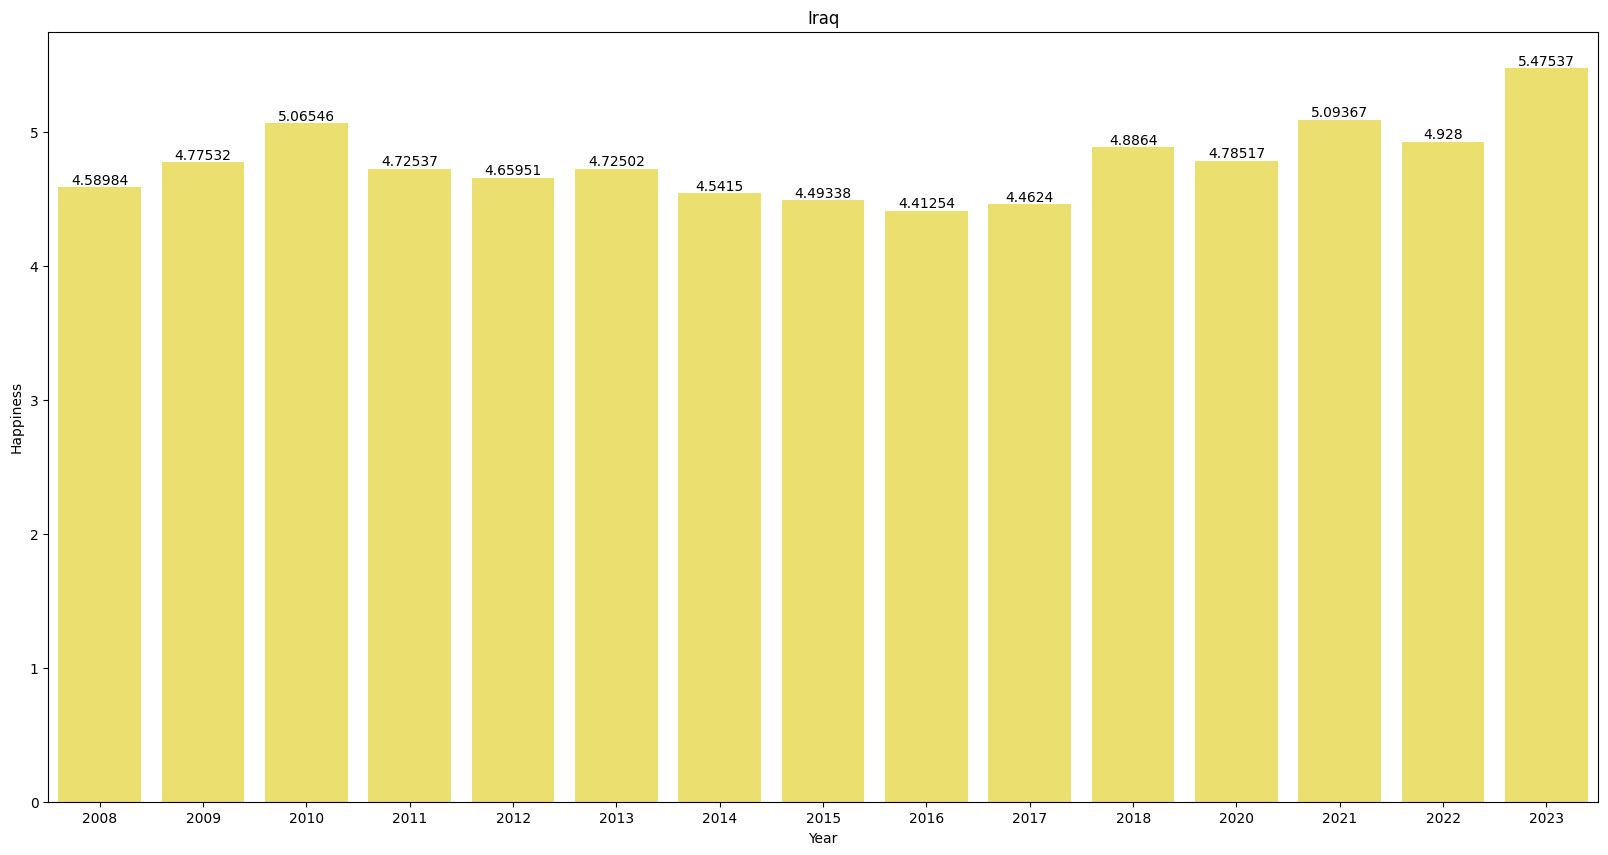

In [27]:
"""Making a function to verify that the input is actually valid and in the source being used for the chart."""
country_input = ''
def check_country() -> str:
    clear_output(wait=True)
    global country_input
    country_input = input("What country would you like to do a happiness report on? Suggestions: Afghanistan, Sierra Leone, Hungary, El Salvador, and Finland").title()
    if (w_h_data['country_name'] == country_input).any():
        return country_input
    else:
        print("That does not exist on the list, please try again.")
        check_country()

check_country()        
w_h_data2 = w_h_data[w_h_data['country_name'] == country_input.title()]
plt.figure(figsize=(20,10))
ax = sns.barplot(x='year', y='happiness_score', data=w_h_data2, color='#FFF05A', errorbar=None, estimator=sum)
ax.set_xlabel("Year")
ax.set_ylabel("Happiness")
plt.title(country_input.title())
for container in ax.containers:
    ax.bar_label(container)
plt.show()



GDP deflator is a price index that measures the average price of all goods and services produced in an economy. Simply put, it helps show whether changes in GDP are due to increased production or higher prices. A positive GDP deflator shows inflation. Most countries saw a drop in inflation in 2020 due to COVID, with spikes both before and after. Anything higher than about 3% is considered to be high. Some countries also see hyperinflation or deflation. Hyperinflation can be disasterous to the economy as it is hard to bring the ecomony back to managable levels. Deflation causes falling prices and people tend to hold off on purchasing things, which stagnates the economy.

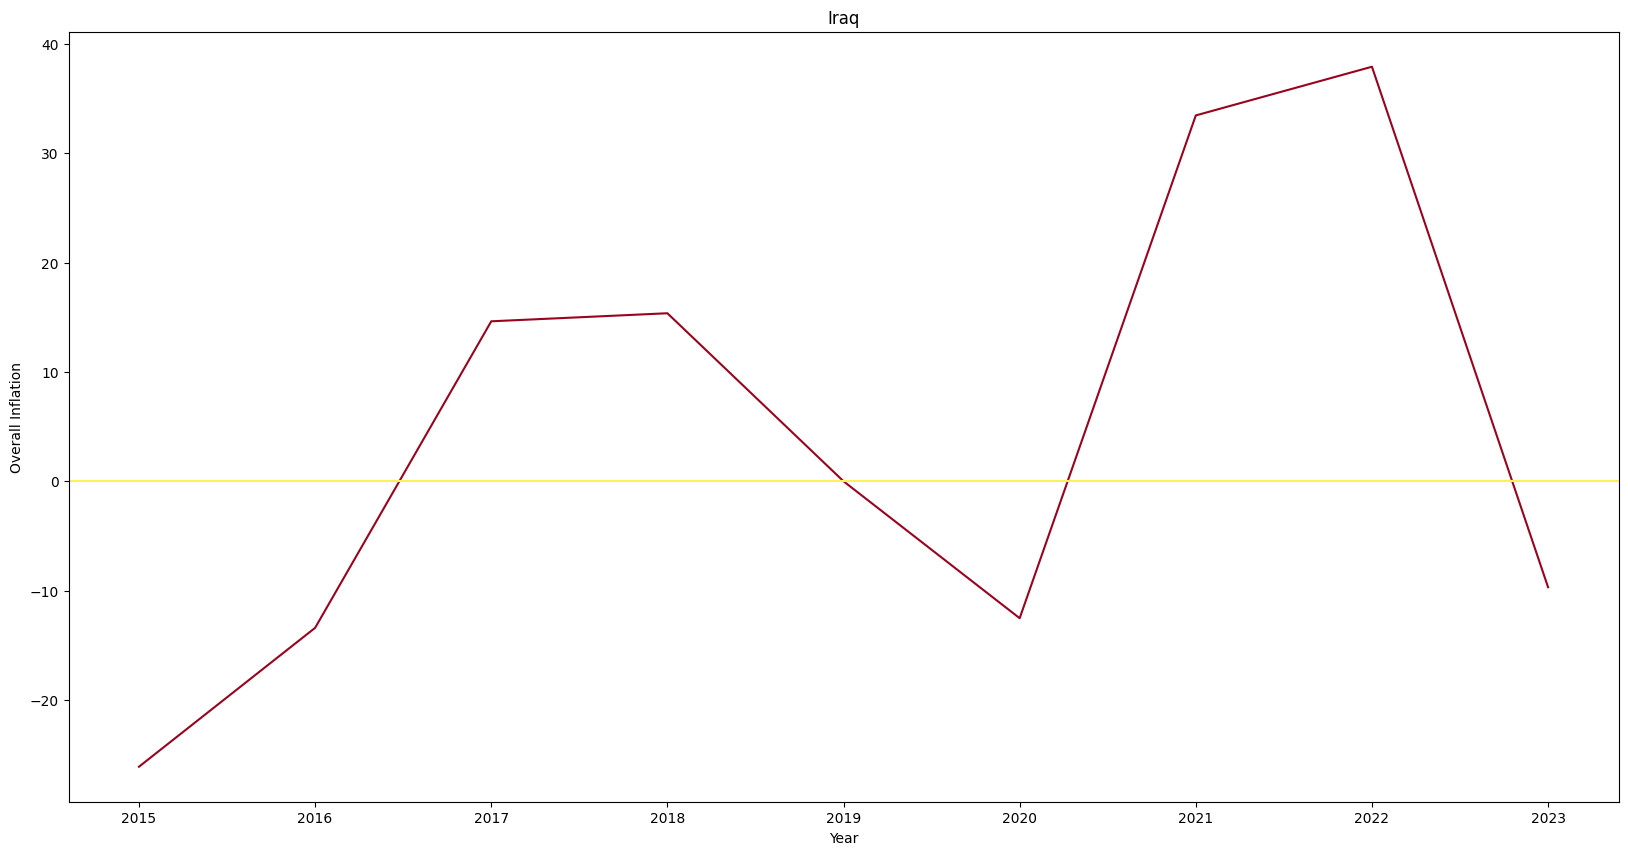

In [28]:
"""Reusing the same function to verify that the input is actually valid and in the source being used for the chart."""
country_input2 = ''
def check_country2() -> str:
    clear_output(wait=True)
    global country_input2
    country_input2 = input("What country would you like to do an inflation report on? Suggestions: Iraq, Switzerland, Israel, United States, and Zimbabwe").title()
    if (inf_data['country'] == country_input2).any():
        return country_input2
    else:
        print("That does not exist on the list, please try again.")
        check_country2()


check_country2()
inf_data2 = inf_data[inf_data['country'] == country_input2.title()]
plt.figure(figsize=(20,10))
ax = sns.lineplot(x='year', y='gdp_deflator_index', data=inf_data2, color='#9A031E', errorbar=None)
ax.set_xlabel("Year")
ax.set_ylabel("Overall Inflation")
plt.axhline(y=0, color='#FFF05A')
plt.title(country_input2.title())
plt.show()


After checking the inflation chart, it may be interesting to go back and run the happiness chart on that country to see if high/low inflation affected their happiness.

The happinest nations feel they have a lot of freedom of choice while perceptions of corruption vary widely.
For the unhappy nations, perception of corruption is high while freedom of choice varies widely.

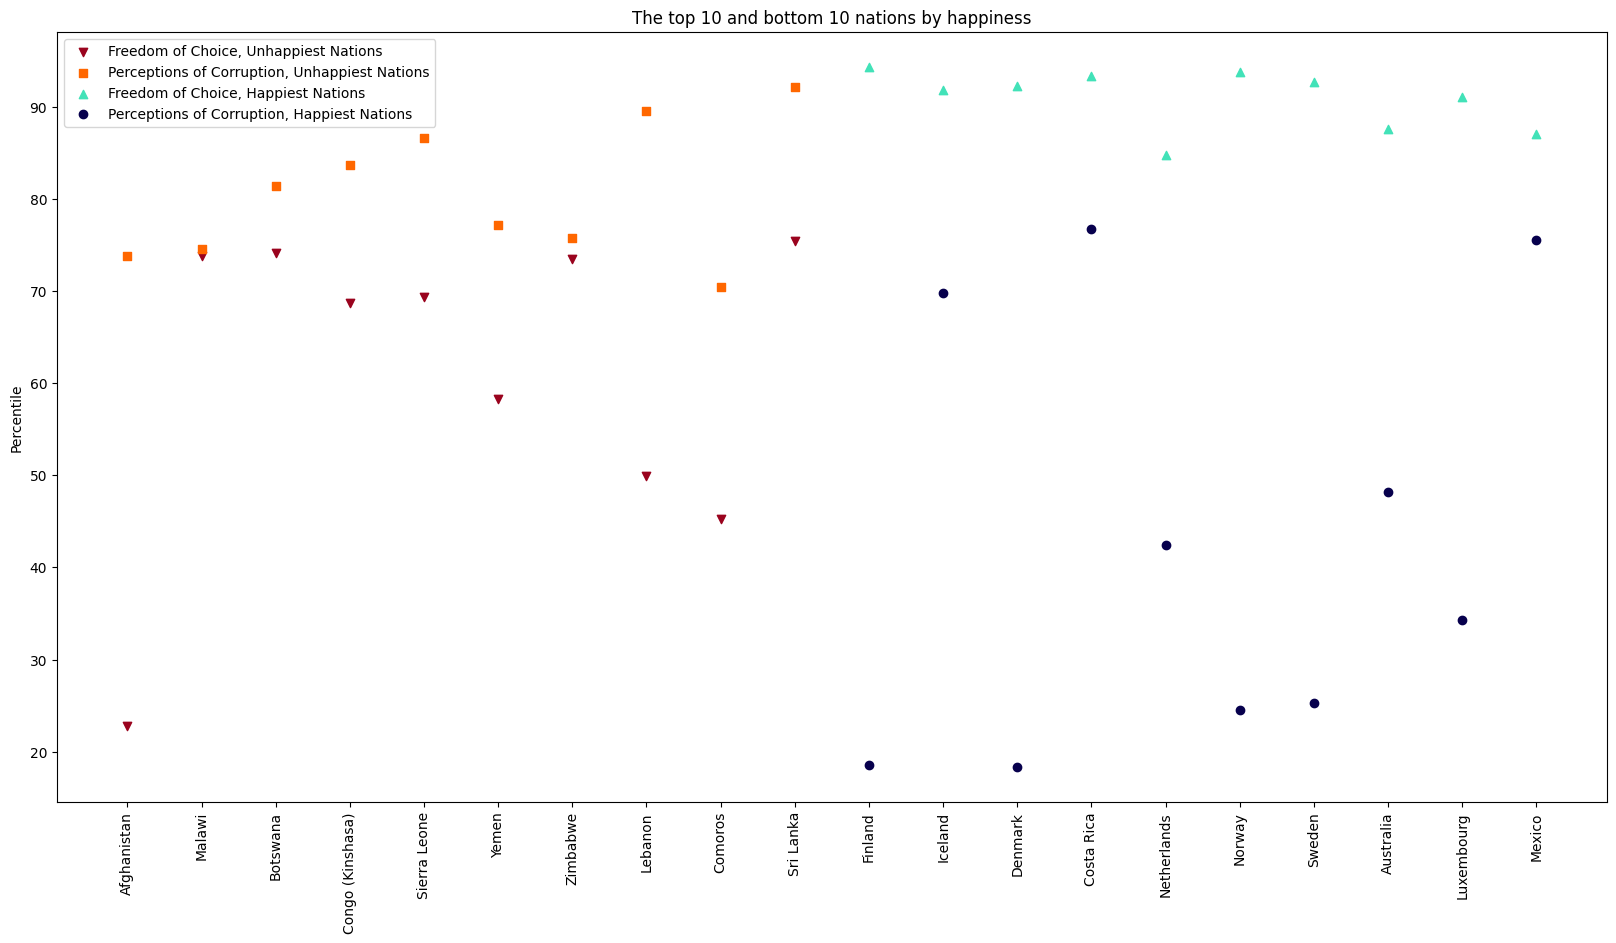

In [29]:
"""Creating a function to ensure that this only runs once even if all the code runs again. This function changes the original data from a decimal to a percentage by multiplying by 100. If this runs more than once, it will scew the numbers."""
w_h_data2 = w_h_data.query('freedom_of_choice > 0 and perceptions_of_corruption > 0')
w_h_data2['happiness_score'] = w_h_data2['happiness_score'].astype(float)

fun_ran = False
def make_percent():
    global fun_ran
    if not fun_ran:
        w_h_data2['freedom_of_choice'] = w_h_data['freedom_of_choice'] *100
        w_h_data2['perceptions_of_corruption'] = w_h_data['perceptions_of_corruption'] *100
        w_h_data2['generosity'] = w_h_data['generosity'] * 100
    
make_percent()

bottom_10_group = w_h_data2[w_h_data2['year'] == 2023]
bottom_10 = bottom_10_group.nsmallest(10, 'happiness_score')
top_10_group = w_h_data2[w_h_data2['year'] == 2023]
top_10 = top_10_group.nlargest(10, 'happiness_score')
clear_output()
plt.figure(figsize=(20,10))
plt.xticks(rotation=90)
plt.scatter(bottom_10['country_name'], bottom_10['freedom_of_choice'], label='Freedom of Choice, Unhappiest Nations',color='#9A031E', marker='v')
plt.scatter(bottom_10['country_name'], bottom_10['perceptions_of_corruption'], label='Perceptions of Corruption, Unhappiest Nations',color='#FF6700', marker='s')
plt.scatter(top_10['country_name'], top_10['freedom_of_choice'], label='Freedom of Choice, Happiest Nations',color='#42E2B8', marker='^')
plt.scatter(top_10['country_name'], top_10['perceptions_of_corruption'], label='Perceptions of Corruption, Happiest Nations',color='#07004D', marker='o')
plt.ylabel('Percentile')
plt.legend()
plt.plot()
plt.title('The top 10 and bottom 10 nations by happiness')
plt.show()



The following chart covers high CO2 emissions and low coverage. Under 10 tons per year is considered normal CO2 and over 10% forest coverage is also considered normal. This was based on 1000 tons as there were SO MANY that fit the original parameters, it didn't fit on the graph, so it had to be moved to 100x the "normal" amount. Having under 10% forest coverage lacks any allievation of the huge amount of emissions released. Higher forest coverage does help, which is why you see high emitors, like China and the US not on the list.
You will see that many of these countries are very low on the happiness scale. Use the input above or check on tableau. 

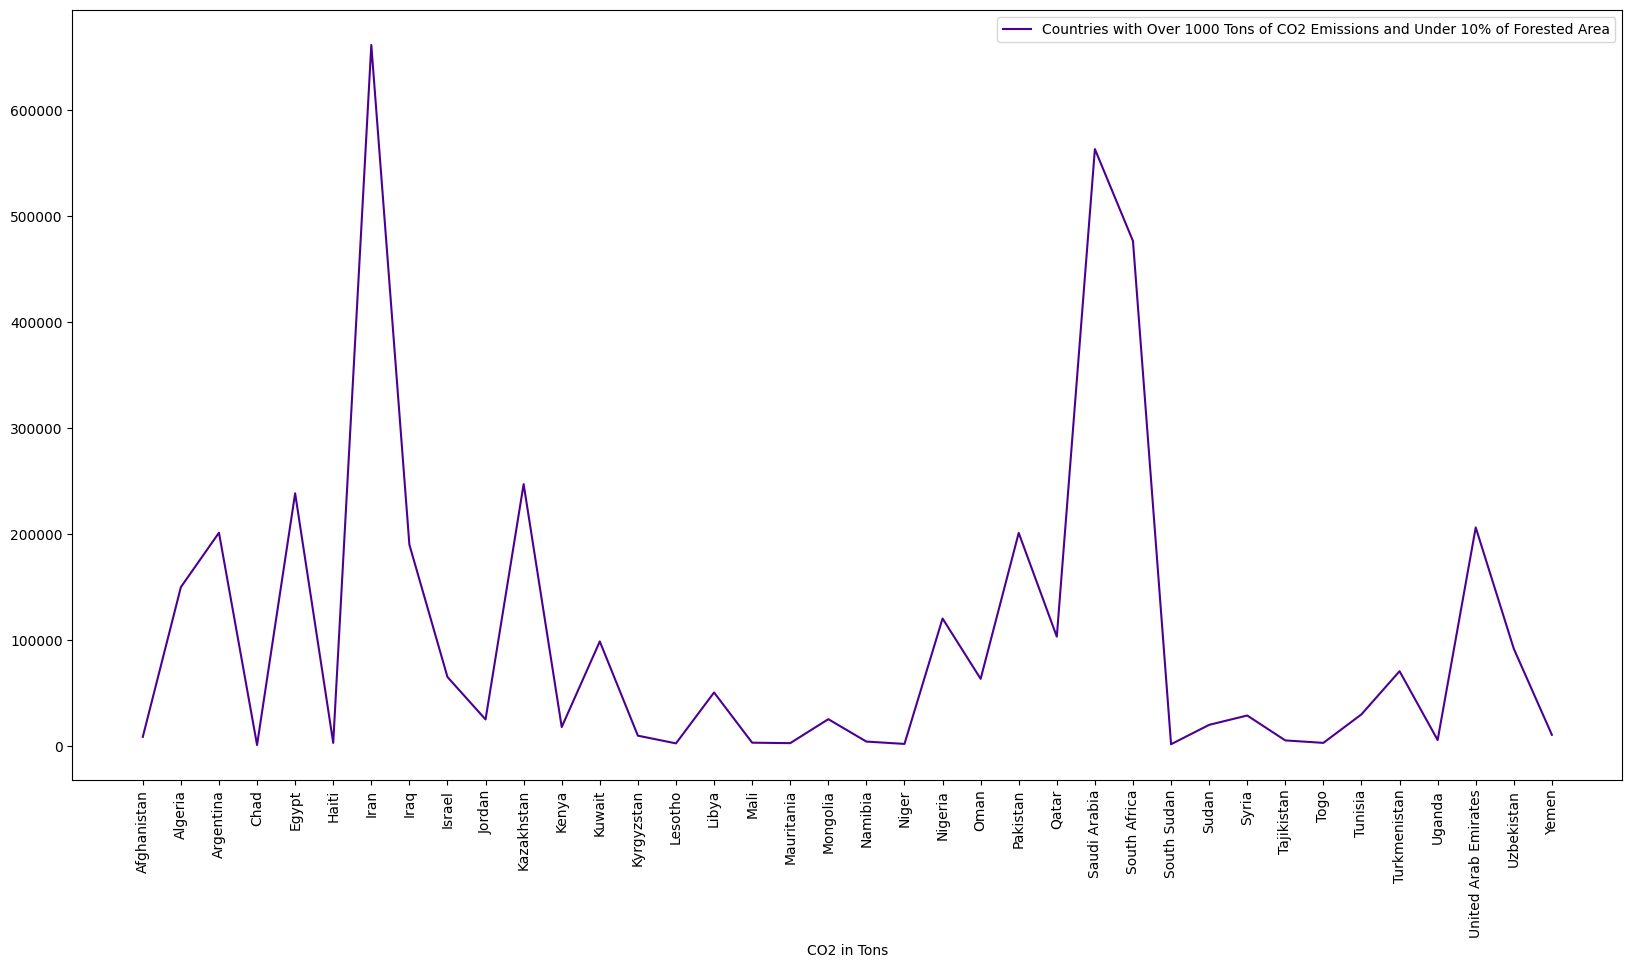

In [30]:
co2 = gci_data[gci_data['co2_emissions'] > 1000]
mask = (co2['density'] < 1000) & (co2['forested_area'] < 10)
clear_output()

plt.figure(figsize=(20,10))
plt.xticks(rotation=90)
plt.plot(co2['country'][mask], co2['co2_emissions'][mask], label='Countries with Over 1000 Tons of CO2 Emissions and Under 10% of Forested Area', color='#4B0092')
plt.xlabel('CO2 in Tons')
plt.legend()
plt.show()


According to WHO, 31 per 1000 is the wordwide average of infant mortality rate (before 1 year old) and 70 per 100,000 is the "goal" for maternal mortality while the worldwide average is closer to 200. This chart includes any country that meets either condition of being higher than the average. There is a line drawn at 31 and 197 for the average of each mortality rate. Again you will see that these high rates are in unhappy countries. 

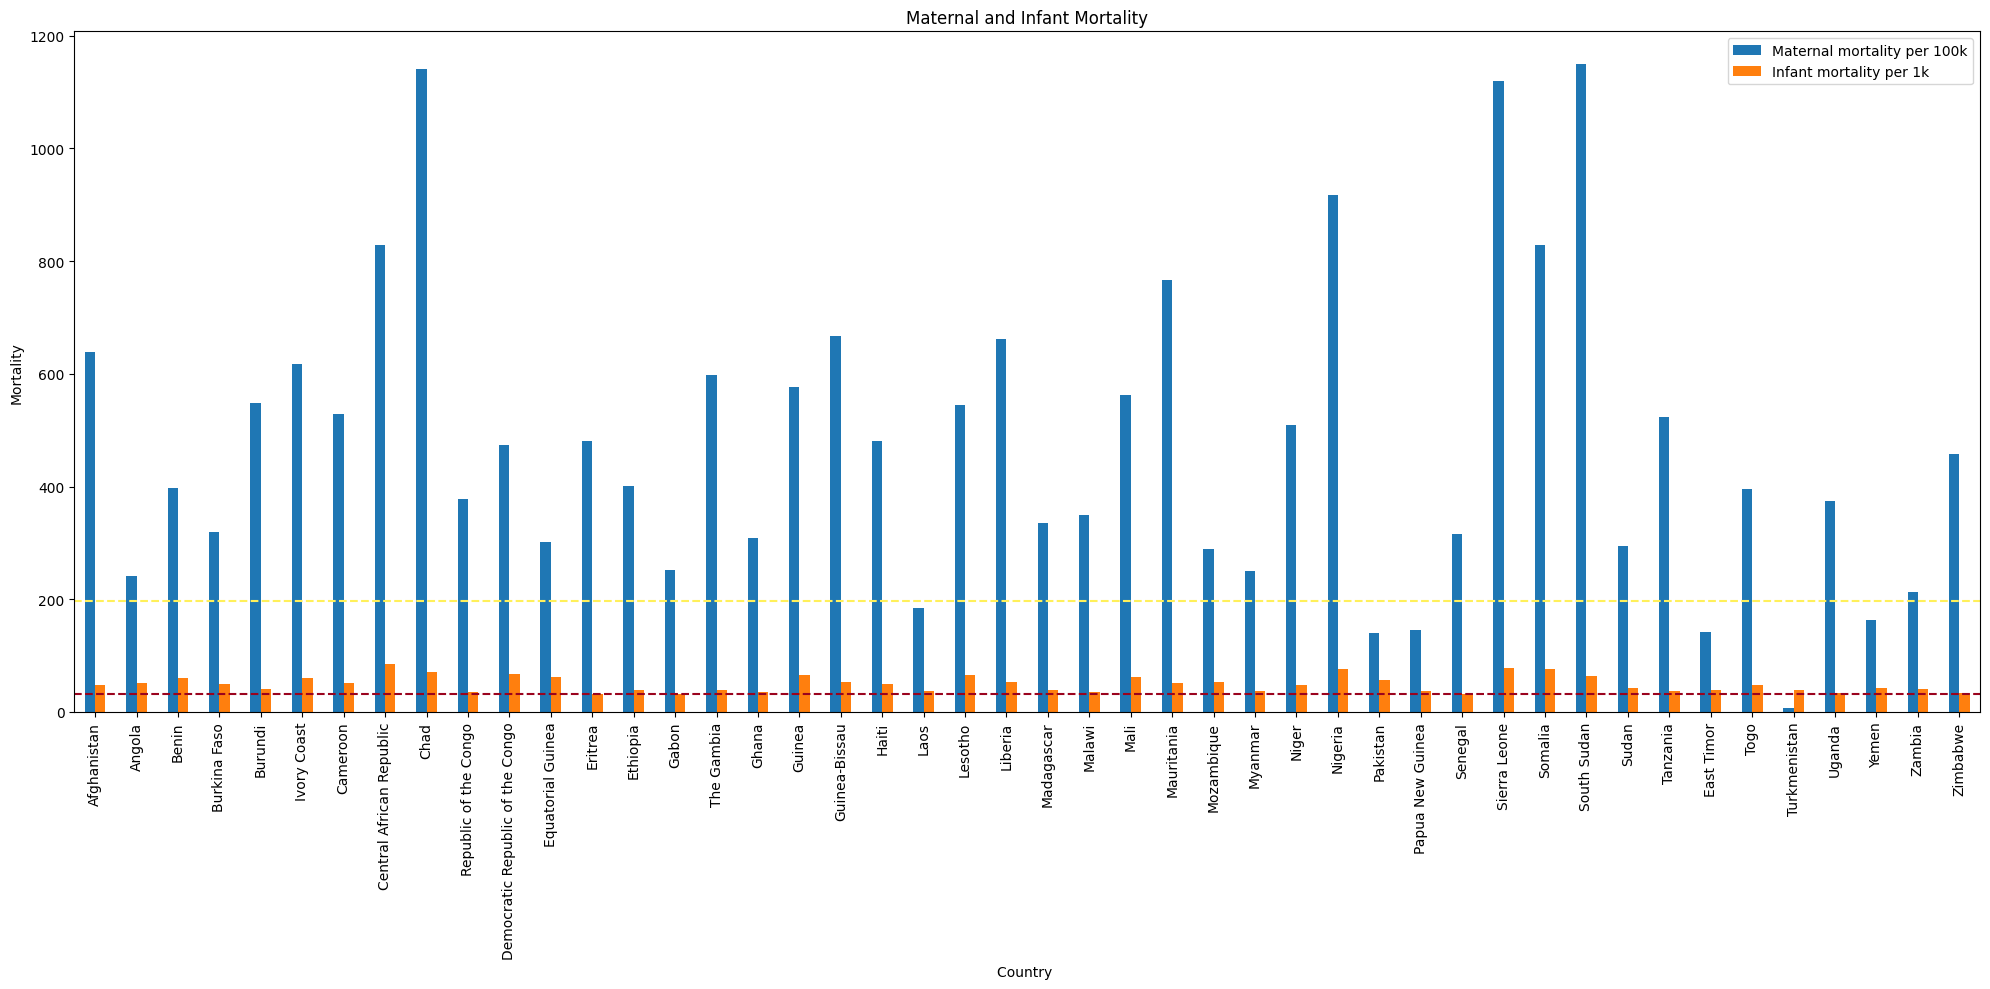

In [31]:

mortality = gci_data[gci_data['maternal_mortality_ratio'] > 197]
mortality = gci_data[gci_data['infant_mortality'] > 31]

mortality.plot(x='country', y=['maternal_mortality_ratio', 'infant_mortality'], kind='bar', figsize=(20,10))
plt.title('Maternal and Infant Mortality')
plt.ylabel('Mortality')
plt.xlabel('Country ')
chart_labels = ['Maternal mortality per 100k', 'Infant mortality per 1k']
plt.legend(labels=chart_labels)
plt.tight_layout()
plt.axhline(y=31, color='#9A031E', linestyle='--', label='Threshold')
plt.axhline(y=197, color='#FFF05A', linestyle='--', label='Threshold')
plt.show()


Filtering by 2023 for SQL tables (WHDATA and WHI)

In [32]:
w_h_data_2023 = w_h_data[(w_h_data['year'] == 2023)]
w_h_data_2023

index,country_name,year,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy_at_birth,freedom_of_choice,generosity,perceptions_of_corruption
14,Afghanistan,2023,1.445909,7.585600,36.85,55.200001,0.228301,0.000000,0.738471
30,Albania,2023,5.444691,9.688706,69.08,69.199997,0.871545,0.067885,0.855425
63,Argentina,2023,6.393229,9.993596,89.21,67.300003,0.831684,-0.129061,0.846094
80,Armenia,2023,5.67909,9.729613,81.93,68.199997,0.819376,-0.179444,0.680709
97,Australia,2023,7.024582,10.846434,89.65,71.199997,0.875769,0.187309,0.481580
...,...,...,...,...,...,...,...,...,...
2295,Venezuela,2023,5.765363,0.000000,88.47,63.700001,0.756530,0.000000,0.825393
2313,Vietnam,2023,6.325115,9.392351,84.49,65.699997,0.955560,-0.159114,0.655275
2327,Yemen,2023,3.531574,0.000000,82.50,56.599998,0.582724,0.000000,0.771464
2344,Zambia,2023,3.685568,8.115053,66.41,56.099998,0.854004,0.092377,0.814191


In [33]:
inf_data_2023 = inf_data[(inf_data['year'] == 2023)]
inf_data_2023

index,country,year,energy_inflation,food_inflation,gdp_deflator_index,score,gdp_per_capita,freedom_to_make_life_choices
8,Afghanistan,2023,0.000000,0.000000,0.000000,1.859,0.645,0.000
17,Albania,2023,-5.068636,0.000000,5.194269,5.277,1.449,0.549
26,Algeria,2023,1.487978,13.256373,-0.429629,5.329,1.353,0.252
39,Argentina,2023,110.883892,144.440149,112.264944,6.024,1.590,0.587
48,Armenia,2023,0.000000,-0.494820,2.818734,5.342,1.466,0.551
...,...,...,...,...,...,...,...,...
1195,Uruguay,2023,0.000000,8.737705,4.165137,6.494,1.617,0.683
1204,Uzbekistan,2023,0.000000,12.054104,12.233839,6.014,1.227,0.740
1213,Vietnam,2023,6.527897,3.432899,1.920311,5.763,1.349,0.741
1222,Zambia,2023,7.893496,12.439130,6.671777,3.982,0.914,0.545


Converting dataframes to SQL. Due to the country names being the only unique column, I made the country_name in the world_happiness table the primary key and the country columns the foreign keys in the other tables. This meant I had to generate an integer for the primary keys in the other tables. 

In [34]:
conn = sqlite3.connect("happiness_data.db")
cursor = conn.cursor()


cursor.execute("""
CREATE TABLE IF NOT EXISTS world_happiness (
    country_name TEXT PRIMARY KEY,
    year INTEGER NOT NULL,
    happiness_score REAL NOT NULL,
    gdp_per_capita REAL NOT NULL,
    social_support REAL NOT NULL,
    healthy_life_expectancy_at_birth REAL NOT NULL,
    freedom_of_choice REAL NOT NULL,
    generosity REAL NOT NULL,
    perceptions_of_corruption REAL NOT NULL,
    positive_affect REAL NOT NULL,
    negative_affect REAL NOT NULL
);
""")

w_h_data_2023.to_sql("world_happiness", conn, if_exists="replace", index=False)
conn.commit()
print(pd.read_sql_query("SELECT * FROM  world_happiness", conn))


    country_name  year  happiness_score  gdp_per_capita  social_support  \
0    Afghanistan  2023         1.445909        7.585600           36.85   
1        Albania  2023         5.444691        9.688706           69.08   
2      Argentina  2023         6.393229        9.993596           89.21   
3        Armenia  2023         5.679090        9.729613           81.93   
4      Australia  2023         7.024582       10.846434           89.65   
..           ...   ...              ...             ...             ...   
133    Venezuela  2023         5.765363        0.000000           88.47   
134      Vietnam  2023         6.325115        9.392351           84.49   
135        Yemen  2023         3.531574        0.000000           82.50   
136       Zambia  2023         3.685568        8.115053           66.41   
137     Zimbabwe  2023         3.572386        7.678590           69.38   

     healthy_life_expectancy_at_birth  freedom_of_choice  generosity  \
0                          

In [35]:
cursor.execute("""
CREATE TABLE IF NOT EXISTS expectancy (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    country TEXT NOT NULL,
    male_life_expectancy REAL NOT NULL,
    female_life_expectancy REAL NOT NULL, 
    happiness_score REAL NOT NULL,
    fertility_rate REAL NOT NULL,
    gdp_per_capita REAL NOT NULL,
    suicide_rate REAL NOT NULL,
    FOREIGN KEY (country) REFERENCES world_happiness(country_name)
    );
""")

life_death_data.to_sql("expectancy", conn, if_exists="replace", index=False)
conn.commit()
print(pd.read_sql_query("SELECT * FROM  expectancy", conn))

                  country  male_life_expectancy  female_life_expectancy  \
0             Afghanistan                  60.6                    68.2   
1                 Albania                  74.8                    81.3   
2                 Algeria                  73.3                    78.9   
3                 Andorra                  81.7                    84.8   
4                  Angola                  58.1                    65.6   
..                    ...                   ...                     ...   
145           Switzerland                   0.0                     0.0   
146              Thailand                   0.0                     0.0   
147  United Arab Emirates                  76.3                    80.6   
148        United Kingdom                  79.0                    83.0   
149         United States                  76.1                    81.1   

     happiness_score  fertility_rate  gdp_per_capita  suicide_rate  
0              3.794          

In [36]:
cursor.execute("""
CREATE TABLE IF NOT EXISTS inflation (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    country TEXT NOT NULL,
    year INTEGER NOT NULL,
    energy_consumer_price_inflation REAL NOT NULL, 
    food_consumer_price_inflation REAL NOT NULL,
    gdp_deflator_index_growth_rate REAL NOT NULL,
    score REAL NOT NULL,
    gdp_per_capita REAL NOT NULL,
    freedom_to_make_life_choices REAL NOT NULL,
    FOREIGN KEY (country) REFERENCES world_happiness(country_name)
);
""")

inf_data_2023.to_sql("inflation", conn, if_exists="replace", index=False)
conn.commit()
print(pd.read_sql_query("SELECT * FROM  inflation", conn))

         country  year  energy_inflation  food_inflation  gdp_deflator_index  \
0    Afghanistan  2023          0.000000        0.000000            0.000000   
1        Albania  2023         -5.068636        0.000000            5.194269   
2        Algeria  2023          1.487978       13.256373           -0.429629   
3      Argentina  2023        110.883892      144.440149          112.264944   
4        Armenia  2023          0.000000       -0.494820            2.818734   
..           ...   ...               ...             ...                 ...   
117      Uruguay  2023          0.000000        8.737705            4.165137   
118   Uzbekistan  2023          0.000000       12.054104           12.233839   
119      Vietnam  2023          6.527897        3.432899            1.920311   
120       Zambia  2023          7.893496       12.439130            6.671777   
121     Zimbabwe  2023        115.380648        0.000000          812.247463   

     score  gdp_per_capita  freedom_to_

In [37]:
cursor.execute("""
CREATE TABLE IF NOT EXISTS global (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    country TEXT NOT NULL,
    birth_rate REAL NOT NULL,
    co2_emissions INTEGER NOT NULL, 
    fertility_rate REAL NOT NULL,
    forested_area REAL NOT NULL,
    gdp REAL NOT NULL,
    primary_education_enrollment REAL NOT NULL,
    tertiary_education_enrollment REAL NOT NULL,
    infant_mortality REAL NOT NULL,
    life_expectancy REAL NOT NULL, 
    maternal_mortality_ratio REAL NOT NULL,
    minimum_wage REAL NOT NULL,
    out_of_pocket_health_expenditure REAL NOT NULL,
    physicians_per_thousand REAL NOT NULL,
    population INTEGER NOT NULL,
    labor_force_participation REAL NOT NULL, 
    tax_revenue REAL NOT NULL,
    unemployment_rate REAL NOT NULL, 
    FOREIGN KEY (country) REFERENCES world_happiness(country_name)
);
""")

gci_data.to_sql("global", conn, if_exists="replace", index=False)
conn.commit()
print(pd.read_sql_query("SELECT * FROM  global", conn))


         country  density  birth_rate  co2_emissions  fertility_rate  \
0    Afghanistan     60.0       32.49         8672.0            4.47   
1        Albania    105.0       11.78         4536.0            1.62   
2        Algeria     18.0       24.28       150006.0            3.02   
3         Angola     26.0       40.73        34693.0            5.52   
4      Argentina     17.0       17.02       201348.0            2.26   
..           ...      ...         ...            ...             ...   
150    Venezuela     32.0       17.88       164175.0            2.27   
151      Vietnam    314.0       16.75       192668.0            2.05   
152        Yemen     56.0       30.45        10609.0            3.79   
153       Zambia     25.0       36.19         5141.0            4.63   
154     Zimbabwe     38.0       30.68        10983.0            3.62   

     forested_area           gdp  primary_education_enrollment  \
0              2.1  1.910135e+10                         104.0   
1  

In [38]:
""""Making a function to return and print information from queries that are created and ran."""
def query(query: str):
    return pd.read_sql(query, conn)

The happiness score of countries with low minimum wage and high cost of health care (by joining of the expectancy and global tables).

In [39]:
expenses = """
    SELECT expectancy.happiness_score, global.country
    FROM expectancy
    JOIN global
    ON expectancy.country = global.country
    WHERE out_of_pocket_health_expenditure > 25
    AND minimum_wage < 10;
"""
query(expenses)

,happiness_score,country
0,3.794,Afghanistan
1,4.959,Albania
2,5.605,Algeria
3,4.105,Angola
4,4.853,Armenia
...,...,...
68,6.139,Peru
69,5.199,Philippines
70,6.346,Portugal
71,6.710,Singapore


Joining the world happiness and inflation data tables based on the primary key of country names, comparing low generosity and high food inflation with happiness. 
As you can see, these 2 things do not necessarily make people unhappy, as several countries rank in the 6-7+ happiness range, even with negative generosity scores and food inflation of more than 20%. 

In [40]:
inflation = """
    SELECT world_happiness.country_name, world_happiness.happiness_score
    FROM world_happiness
    INNER JOIN inflation
    ON world_happiness.country_name = inflation.country
    WHERE world_happiness.generosity < 0 AND
    inflation.food_inflation > 20 AND          
    inflation.year = 2023 AND
    world_happiness.year = 2023
    ORDER BY happiness_score DESC;
"""
query(inflation)

,country_name,happiness_score
0,Argentina,6.393229
1,Hungary,5.965178
2,Lebanon,3.587908


The 2 queries below show the lowest and highest suicide rates in the world along with the country's population and happiness score.  (Rate per 100k people)

In [50]:
suicide_low ="""
    SELECT expectancy.country, global.population, expectancy.happiness_score, expectancy.suicide_rate FROM expectancy
    RIGHT JOIN global
    ON expectancy.country = global.country
    WHERE suicide_rate < 14 AND suicide_rate != 0
    ORDER by suicide_rate DESC
    LIMIT 5;
"""
query(suicide_low)


,country,population,happiness_score,suicide_rate
0,Burkina Faso,20321378,4.944,13.7
1,Ecuador,17373662,5.958,13.5
2,Guinea,12771246,4.064,13.4
3,Indonesia,270203917,5.135,13.4
4,Mauritius,1265711,5.974,13.4


In [51]:
suicide_high ="""
    SELECT expectancy.country, global.population, expectancy.happiness_score, expectancy.suicide_rate FROM expectancy
    RIGHT JOIN global
    ON expectancy.country = global.country
    WHERE suicide_rate > 30 AND suicide_rate != 0
    ORDER by suicide_rate DESC
    LIMIT 5;
"""

query(suicide_high)

,country,population,happiness_score,suicide_rate
0,Armenia,2957731,4.853,39.7
1,Latvia,1912789,6.646,33.2
2,Albania,2854191,4.959,32.4
3,Mongolia,3225167,5.225,32.1
4,Belarus,9466856,5.892,31.4


Even countries with higher learning (tertiary is anything beyond high school level learning) can experience high unemployment rates. Worldwide average for 2023 was just under 5%. Although it does seem most countries that have higher enrollment levels, are happier despite their enemployment rates. 

In [52]:
education_vs_unemployment ="""
    SELECT  global.country, world_happiness.happiness_score, global.tertiary_education_enrollment, global.unemployment_rate FROM world_happiness
    LEFT JOIN global
    ON world_happiness.country_name = global.country
    WHERE world_happiness.year = 2023 AND
    global.unemployment_rate > 5
    ORDER BY happiness_score DESC
    LIMIT 20;
"""
query(education_vs_unemployment)


,country,happiness_score,tertiary_education_enrollment,unemployment_rate
0,Finland,7.698929,88.2,6.59
1,Costa Rica,7.384069,55.2,11.85
2,Sweden,7.160777,67.0,6.48
3,Australia,7.024582,113.1,5.27
4,Saudi Arabia,6.953374,68.0,5.93
5,Belgium,6.943599,79.7,5.59
6,Canada,6.841207,68.9,5.56
7,Uruguay,6.661722,63.1,8.73
8,France,6.556921,65.6,8.43
9,Brazil,6.552691,51.3,12.08


10% of the happiest nations believe they have a lot of freedom of choice, above 84%.

In [44]:
freedom_top_20 ="""
SELECT freedom_of_choice, happiness_score, country_name
FROM world_happiness
ORDER BY happiness_score DESC
LIMIT 20;
"""
query(freedom_top_20)

,freedom_of_choice,happiness_score,country_name
0,0.943418,7.698929,Finland
1,0.918377,7.561609,Iceland
2,0.922739,7.504193,Denmark
3,0.933381,7.384069,Costa Rica
4,0.847287,7.254794,Netherlands
5,0.937649,7.248675,Norway
6,0.926379,7.160777,Sweden
7,0.897539,7.130284,Kuwait
8,0.875769,7.024582,Australia
9,0.910813,7.016062,Luxembourg


8% of the unhappiest nations have less than 76% rating in freedom of choice and the lowest happiness rating of all nations is under 25%.

In [53]:
freedom_bottom_20 ="""
SELECT freedom_of_choice, happiness_score, country_name
FROM world_happiness
WHERE freedom_of_choice != 0 
ORDER BY happiness_score ASC
LIMIT 20;
"""
query(freedom_bottom_20)

,freedom_of_choice,happiness_score,country_name
0,0.228301,1.445909,Afghanistan
1,0.738372,3.272092,Malawi
2,0.741224,3.331648,Botswana
3,0.687303,3.383398,Congo (Kinshasa)
4,0.693507,3.466578,Sierra Leone
5,0.582724,3.531574,Yemen
6,0.734613,3.572386,Zimbabwe
7,0.499206,3.587908,Lebanon
8,0.452211,3.588056,Comoros
9,0.753907,3.602455,Sri Lanka


Following is what might be the most important query in the whole project:
Social support was based on yes or no answers, so the closer to 100 it is, the more yes answers received to the question about having friends or relatives to count on in times of trouble.
GDP per capita is a metric that represents the economic output per person.
Low income: Under 1025  
Middle income: 1025-12475  
High income: Above 12475  
Wealthy: Above 25000  
Very wealthy: Above 50000  
In 2023, the average GDP per capita was 13170.  
The charts show a threshold line at 12475.

In [58]:
chart_sup_gdp ="""
SELECT country_name, social_support, world_happiness.happiness_score, expectancy.gdp_per_capita
FROM world_happiness
JOIN expectancy
ON world_happiness.country_name = expectancy.country
WHERE expectancy.gdp_per_capita != 0
"""


In [59]:
chart_data = pd.read_sql(chart_sup_gdp, conn)
chart_data.head()

,country_name,social_support,happiness_score,gdp_per_capita
0,Afghanistan,36.85,1.445909,1105.0
1,Albania,69.08,5.444691,4932.0
2,Argentina,89.21,6.393229,14647.0
3,Armenia,81.93,5.679090,3456.0
4,Australia,89.65,7.024582,59542.0


This chart shows GPD per Capita and the countries are listed by happiness, low to high.

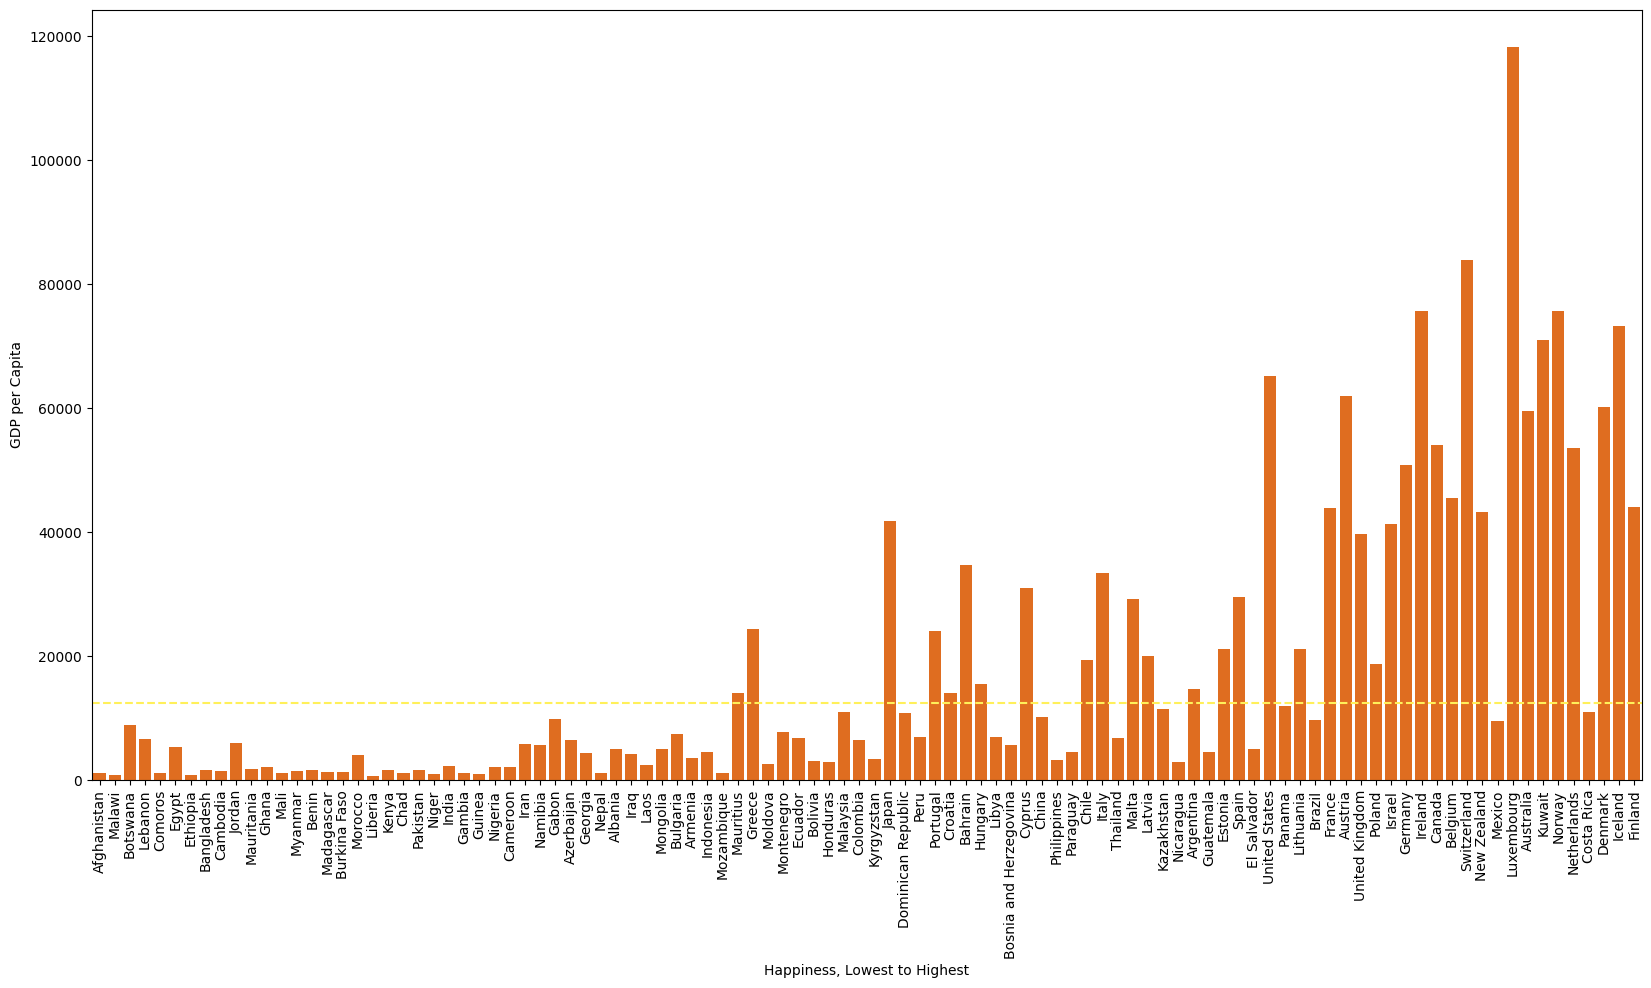

In [ ]:
plt.figure(figsize=(20,10))
order = chart_data.sort_values('happiness_score').country_name
sns.barplot(x='country_name', y='gdp_per_capita', data=chart_data, errorbar=None, color='#FF6700', order=order)
plt.xticks(rotation=90)
plt.xlabel('Happiness, Lowest to Highest')
plt.ylabel('GDP per Capita')
plt.axhline(y=12475, color='#FFF05A', linestyle='--', label='Threshold')
plt.legend()
plt.show()

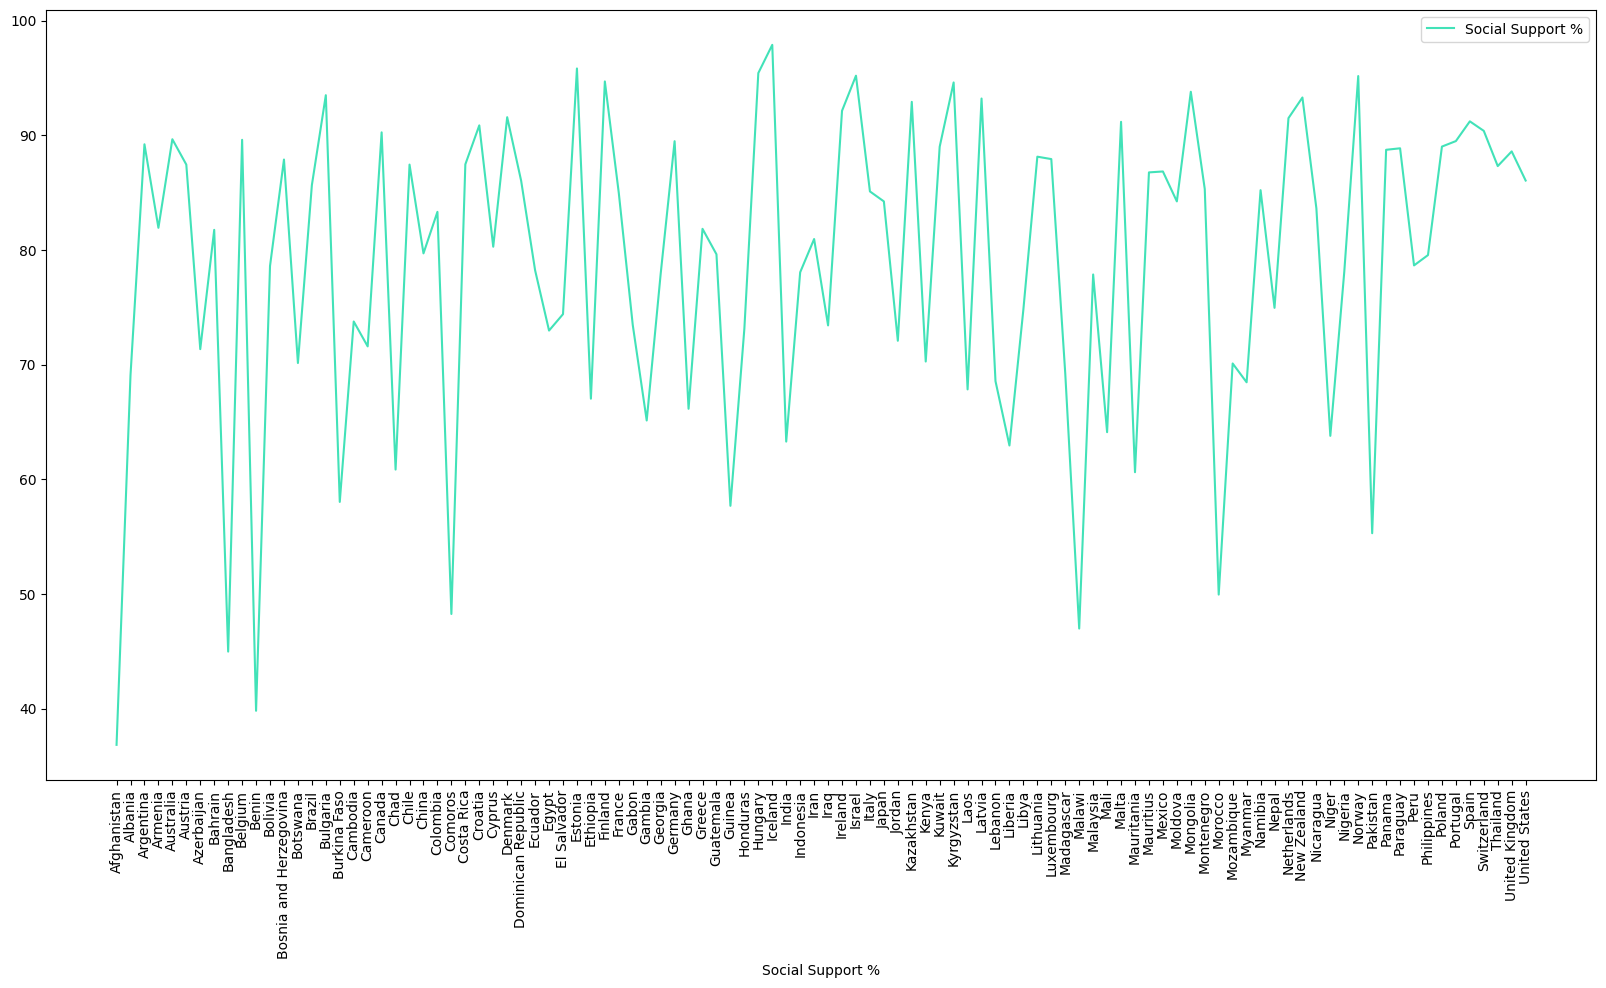

In [96]:
plt.figure(figsize=(20,10))
plt.xticks(rotation=90)
plt.plot(chart_data['country_name'],chart_data['social_support'], label='Social Support %', color='#42E2B8')
plt.xlabel('Social Support %')
plt.legend()
plt.show()


In [87]:
gdp_sup_bottom_25 ="""
SELECT country_name, social_support, world_happiness.happiness_score, expectancy.gdp_per_capita
FROM world_happiness
JOIN expectancy
ON world_happiness.country_name = expectancy.country
WHERE expectancy.gdp_per_capita != 0 AND
social_support !=0 
ORDER BY world_happiness.happiness_score ASC
LIMIT 25;
"""


In [88]:
chart_bottom_25 = pd.read_sql(gdp_sup_bottom_25, conn)
chart_bottom_25.head()

,country_name,social_support,happiness_score,gdp_per_capita
0,Afghanistan,36.85,1.445909,1105.0
1,Malawi,46.99,3.272092,806.0
2,Botswana,70.14,3.331648,8779.0
3,Lebanon,68.56,3.587908,6620.0
4,Comoros,48.26,3.588056,1107.0


As you can see, the bottom 25 unhappiest countries are among the poorest with low gdp and many have low ratings in social support as well.
The top 25 have extremely high social support scores with 84% of them high income or above gdp groups.
Even the countries with lower incomes have extremely high social support scores.

In [89]:
gdp_sup_top_25 ="""
SELECT country_name, social_support, world_happiness.happiness_score, expectancy.gdp_per_capita
FROM world_happiness
JOIN expectancy
ON world_happiness.country_name = expectancy.country
WHERE expectancy.gdp_per_capita != 0 AND
social_support !=0
ORDER BY world_happiness.happiness_score DESC
LIMIT 25;
"""

In [90]:
chart_top_25 = pd.read_sql(gdp_sup_top_25, conn)
chart_top_25.head()

,country_name,social_support,happiness_score,gdp_per_capita
0,Finland,94.69,7.698929,43966.0
1,Iceland,97.88,7.561609,73181.0
2,Denmark,91.57,7.504193,60069.0
3,Costa Rica,87.46,7.384069,10918.0
4,Netherlands,91.49,7.254794,53582.0


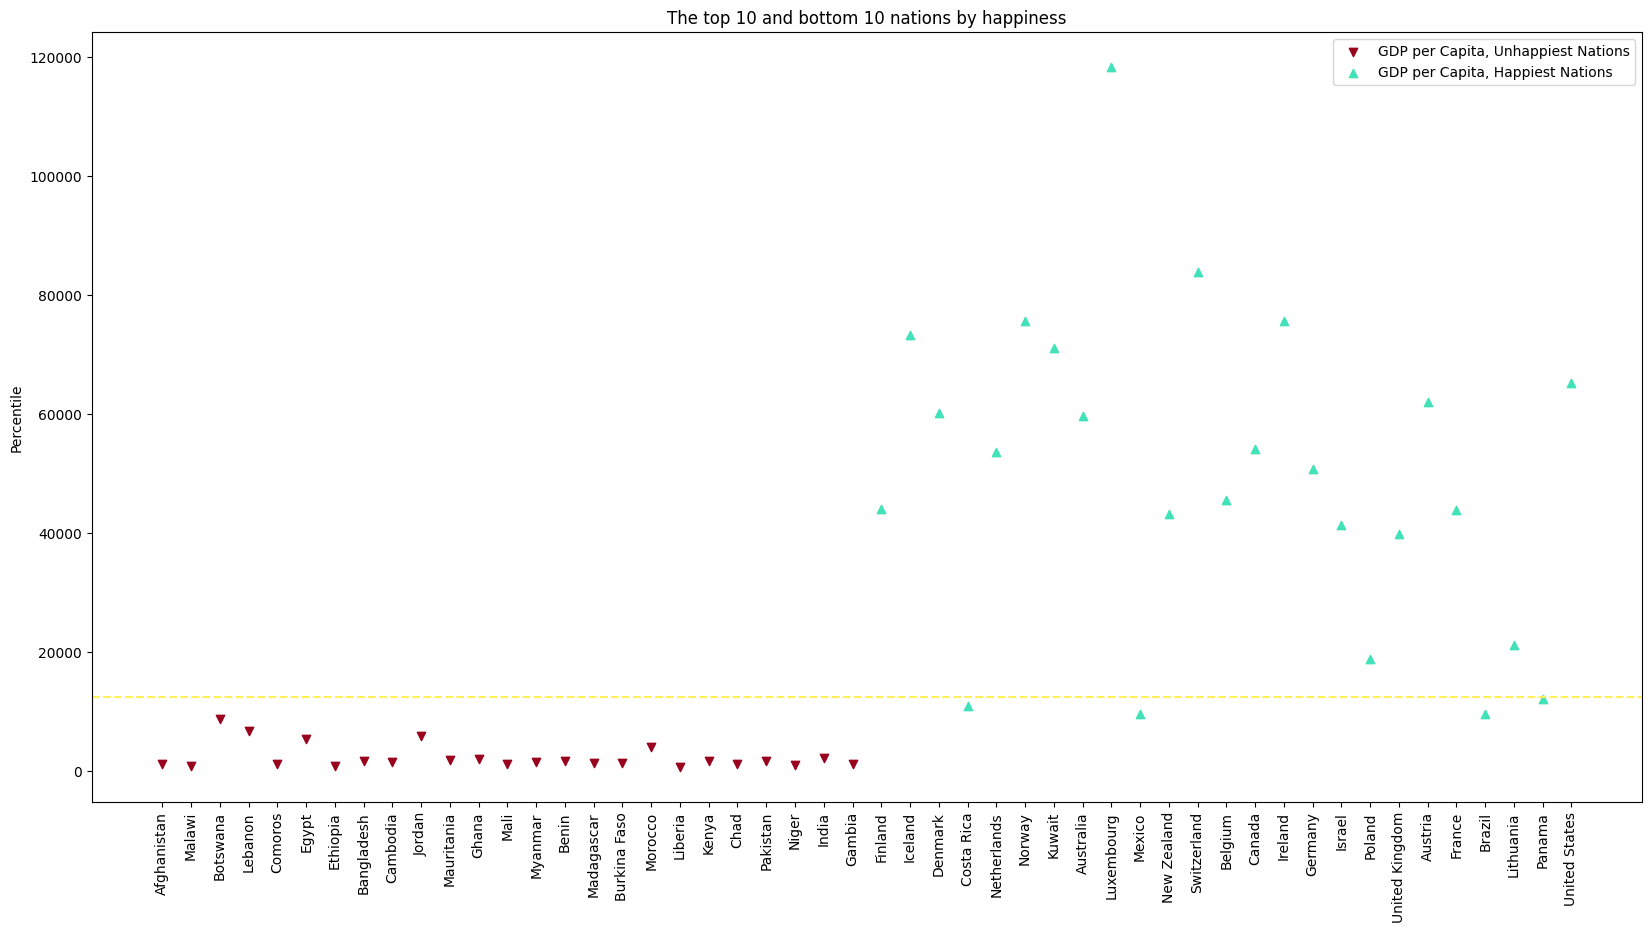

In [94]:

plt.figure(figsize=(20,10))
plt.xticks(rotation=90)
plt.scatter(chart_bottom_25['country_name'], chart_bottom_25['gdp_per_capita'], label='GDP per Capita, Unhappiest Nations',color='#9A031E', marker='v')
plt.scatter(chart_top_25['country_name'], chart_top_25['gdp_per_capita'], label='GDP per Capita, Happiest Nations',color='#42E2B8', marker='^')
plt.ylabel('Percentile')
plt.legend()
plt.axhline(y=12475, color='#FFF05A', linestyle='--', label='Threshold')
plt.plot()
plt.title('The top 10 and bottom 10 nations by happiness')
plt.show()

## Conclusions from this data analysis:

Happier people:  
Likely to have a higher education   
Have better earning power  
Live longer  
Feel they have freedom of choice   
Have an excellent social support system  

Unhappy people:   
Less likely to have education past high school  
Have lower earning power  
Feel they have less freedom  
Have a higher public perception of corruption  
Don't live as long  
This includes much higher than average infant and maternal mortality.   

Please use the links below to view my story and dashboard on Tableau.  

https://public.tableau.com/views/world_happiness_17537384347500/WorldHappinessReport?:language=en-US&publish=yes&:sid=&:redirect=auth&:display_count=n&:origin=viz_share_link

https://public.tableau.com/shared/DQTRXWRRX?:display_count=n&:origin=viz_share_link
